In [89]:
%reset -fs

In [90]:
import pandas as pd
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [91]:
diamond_df = pd.read_csv('../data/BMP_data.csv', index_col=None)

In [92]:
diamond_df.head(20)

,one_level_bot,temp1,pH1,two_level_bot,temp2,pH2,bio_gas_total_bot,gas_total_bot,process_fajiao,process_raw,...,FAJIAO_ANDAN,FAJIAO_ZONGDAN,FAJIAO_YOUJISUAN,FOS_TAC,CHP,WORKING_TIME,BIO_GAS_PRODUCE,JIAWAN_PRODUCE,ELC_PRODUCE,HEAT_PRODUCE
0,5000,43.0,7.837708,4600.0,41.0,7.83,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,140,0.157727,800,8505,3381385,50.600000,6493000,4344077
1,5000,44.8,7.890972,4600.0,42.0,7.93,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,145,0.168788,800,7675,2979076,52.139452,5956286,4524874
2,3300,43.0,7.740556,NaN,NaN,NaN,4000,1100,CSTR,"NawaRo, farm fertilizer",...,2.260000,4.471667,210,0.150000,400,8642,1660704,52.008219,3332435,2184780
3,5000,43.0,7.837708,4600.0,41.0,7.83,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,140,0.157727,800,8505,3381385,50.600000,6493000,4344077
4,5000,44.8,7.890972,4600.0,42.0,7.93,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,145,0.168788,800,7675,2979076,52.139452,5956286,4524874
5,5000,43.0,7.837708,4600.0,41.0,7.83,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,140,0.157727,800,8505,3381385,50.600000,6493000,4344077
6,5000,44.8,7.890972,4600.0,42.0,7.93,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,145,0.168788,800,7675,2979076,52.139452,5956286,4524874
7,5000,44.8,7.890972,4600.0,42.0,7.93,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,145,0.168788,800,7675,2979076,52.139452,5956286,4524874
8,5000,43.0,7.837708,4600.0,41.0,7.83,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,140,0.157727,800,8505,3381385,50.600000,6493000,4344077
9,5000,44.8,7.890972,4600.0,42.0,7.93,2500,2400,CSTR,NawaRo,...,2.270833,5.083333,145,0.168788,800,7675,2979076,52.139452,5956286,4524874


In [93]:
diamond_df.shape

(119, 28)

In [94]:
diamond_df.isna().sum()

one_level_bot         0
temp1                 0
pH1                   0
two_level_bot         1
temp2                 1
pH2                   1
bio_gas_total_bot     0
gas_total_bot         0
process_fajiao        0
process_raw           0
process_raw_weight    0
TS_FM                 0
VS_TS                 0
fajiao_TS             0
fajiao_VS             0
ORGAN_KG              0
WATER_POWER_TIME      0
PH3                   0
FAJIAO_ANDAN          0
FAJIAO_ZONGDAN        0
FAJIAO_YOUJISUAN      0
FOS_TAC               0
CHP                   0
WORKING_TIME          0
BIO_GAS_PRODUCE       0
JIAWAN_PRODUCE        0
ELC_PRODUCE           0
HEAT_PRODUCE          0
dtype: int64

In [95]:
diamond_df.dtypes

one_level_bot           int64
temp1                 float64
pH1                   float64
two_level_bot         float64
temp2                 float64
pH2                   float64
bio_gas_total_bot       int64
gas_total_bot           int64
process_fajiao         object
process_raw            object
process_raw_weight    float64
TS_FM                 float64
VS_TS                 float64
fajiao_TS             float64
fajiao_VS             float64
ORGAN_KG              float64
WATER_POWER_TIME      float64
PH3                   float64
FAJIAO_ANDAN          float64
FAJIAO_ZONGDAN        float64
FAJIAO_YOUJISUAN        int64
FOS_TAC               float64
CHP                     int64
WORKING_TIME            int64
BIO_GAS_PRODUCE         int64
JIAWAN_PRODUCE        float64
ELC_PRODUCE             int64
HEAT_PRODUCE            int64
dtype: object

In [96]:
diamond_df.process_fajiao = diamond_df.process_fajiao.replace({"CSTR":0, "USR":1,"UASB":2})

diamond_df.process_raw = diamond_df.process_raw.replace({"NawaRo":0, "NawaRo, farm fertilizer":1})

In [97]:
diamond_df.cut.value_counts()

AttributeError: 'DataFrame' object has no attribute 'cut'

In [98]:
# Encode the ordinal categorical variable 'cut'
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

AttributeError: 'DataFrame' object has no attribute 'cut'

In [99]:
diamond_df.color.value_counts()

AttributeError: 'DataFrame' object has no attribute 'color'

In [100]:
# Encoding the ordinal categorical variable 'color'
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

AttributeError: 'DataFrame' object has no attribute 'color'

In [101]:
diamond_df.clarity.value_counts()

AttributeError: 'DataFrame' object has no attribute 'clarity'

In [102]:
# Encoding the ordinal cateogircal variable 'clarity'
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

AttributeError: 'DataFrame' object has no attribute 'clarity'

In [103]:
diamond_df.describe()

,one_level_bot,temp1,pH1,two_level_bot,temp2,pH2,bio_gas_total_bot,gas_total_bot,process_fajiao,process_raw,...,FAJIAO_ANDAN,FAJIAO_ZONGDAN,FAJIAO_YOUJISUAN,FOS_TAC,CHP,WORKING_TIME,BIO_GAS_PRODUCE,JIAWAN_PRODUCE,ELC_PRODUCE,HEAT_PRODUCE
count,119.000000,119.000000,119.000000,118.0,118.000000,118.000000,119.000000,119.000000,119.0,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,1.190000e+02,119.000000,1.190000e+02,1.190000e+02
mean,4985.714286,44.210084,7.872700,4600.0,41.677966,7.897797,2512.605042,2389.075630,0.0,0.008403,...,2.270742,5.078193,143.949580,0.165098,796.638655,7948.168067,3.096466e+06,51.646760,6.105624e+06,4.447476e+06
std,155.838744,0.848468,0.027724,0.0,0.469248,0.046925,137.504775,119.170805,0.0,0.091670,...,0.000993,0.056071,6.537828,0.005353,36.667940,393.090909,2.301186e+05,0.720094,3.586345e+05,2.255934e+05
min,3300.000000,43.000000,7.740556,4600.0,41.000000,7.830000,2500.000000,1100.000000,0.0,0.000000,...,2.260000,4.471667,140.000000,0.150000,400.000000,7675.000000,1.660704e+06,50.600000,3.332435e+06,2.184780e+06
25%,5000.000000,43.000000,7.837708,4600.0,41.000000,7.830000,2500.000000,2400.000000,0.0,0.000000,...,2.270833,5.083333,140.000000,0.157727,800.000000,7675.000000,2.979076e+06,50.600000,5.956286e+06,4.344077e+06
50%,5000.000000,44.800000,7.890972,4600.0,42.000000,7.930000,2500.000000,2400.000000,0.0,0.000000,...,2.270833,5.083333,145.000000,0.168788,800.000000,7675.000000,2.979076e+06,52.139452,5.956286e+06,4.524874e+06
75%,5000.000000,44.800000,7.890972,4600.0,42.000000,7.930000,2500.000000,2400.000000,0.0,0.000000,...,2.270833,5.083333,145.000000,0.168788,800.000000,8505.000000,3.381385e+06,52.139452,6.493000e+06,4.524874e+06
max,5000.000000,44.800000,7.890972,4600.0,42.000000,7.930000,4000.000000,2400.000000,0.0,1.000000,...,2.270833,5.083333,210.000000,0.168788,800.000000,8642.000000,3.381385e+06,52.139452,6.493000e+06,4.524874e+06


In [104]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

KeyError: 'x'

In [105]:
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

KeyError: 'depth'

In [106]:
model_df = diamond_df.copy()

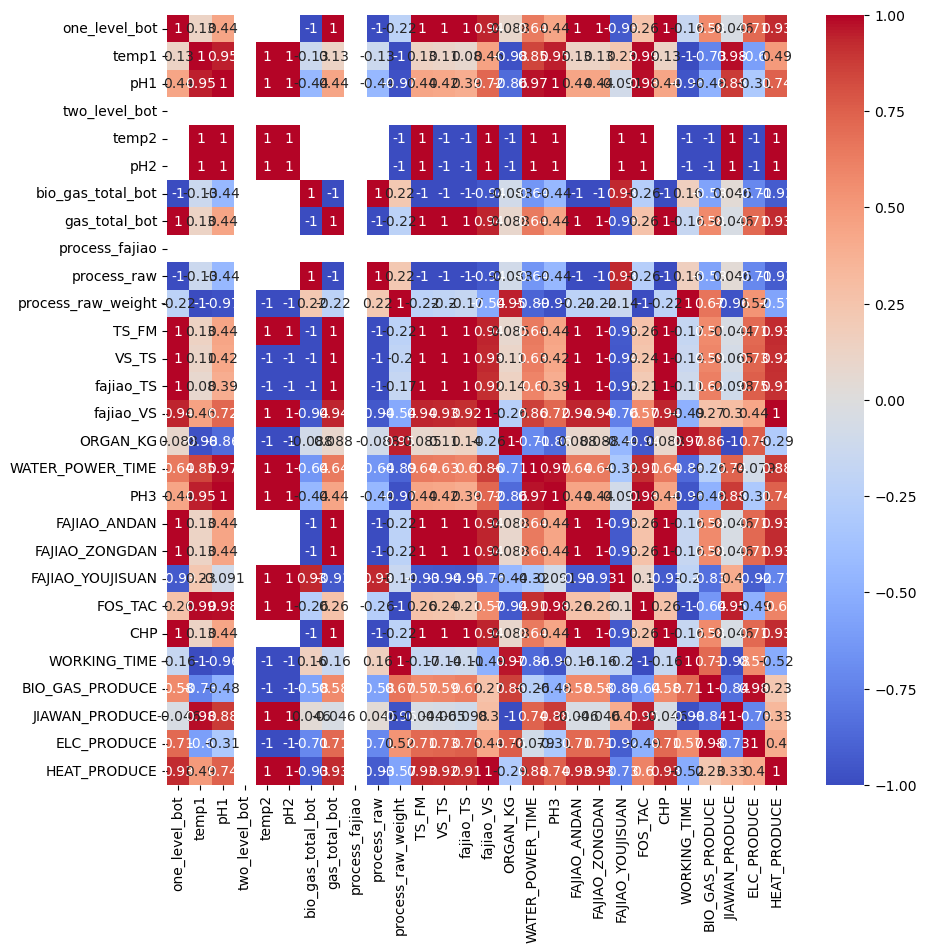

In [107]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(model_df.corr(), annot=True, cmap='coolwarm');

In [108]:
X = model_df.drop(['BIO_GAS_PRODUCE','ELC_PRODUCE','HEAT_PRODUCE'], axis=1)
y = model_df['BIO_GAS_PRODUCE']

In [109]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [111]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

In [112]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

In [113]:
xgb_grid.fit(X_train, y_train)

D:\Program\anaconda3\envs\graduate\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.5, 1.0],
                         'learning_rate': [0.0001, 0.001, 0.01],
                         'max_depth': [3, 5, 7], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [500],
                         'objective': ['reg:squarederror'],
                         'subsample': [0.1, 0.5, 1.0]})

In [114]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.9788397681497555
{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 1.0}


In [115]:
xgb_cv = (xgb_grid.best_estimator_)

In [116]:
eval_set = [(X_train, y_train),
            (X_val, y_val)]

In [117]:
fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)

In [118]:
print("MAE:", mean_absolute_error(y_val, fit_model.predict(X_val)))
print("MSE:", mean_squared_error(y_val, fit_model.predict(X_val)))
print("R2:", r2_score(y_val, fit_model.predict(X_val)))

MAE: 21664.25
MSE: 479281604.5
R2: 0.9729259517843423


In [119]:
print("MAE:", mean_absolute_error(y_test, fit_model.predict(X_test)))
print("MSE:", mean_squared_error(y_test, fit_model.predict(X_test)))
print("R2:", r2_score(y_test, fit_model.predict(X_test)))

MAE: 95492.84375
MSE: 119332597974.17969
R2: 0.112937848939895


In [120]:
fit_model.save_model('../xgb_model.json')